<a href="https://colab.research.google.com/github/AdicherlaVenkataSai/NeuralNetworks/blob/master/1.%20SimpleNNimplemetation(MNIST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Developing a neural network model from scratch using numpy, sklearn library, on MNIST dataset and calculated the accuracy of the model by adjusting the hyper parameters

note: we can directly use sklearn for model development istead we developed using numpy

In [0]:
# Import libraries

import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [0]:
# imporitng dataset from sklearn directly
from sklearn.datasets import fetch_openml#sklearn has structures for neural networks
from sklearn.metrics import classification_report, confusion_matrix# metrics show us how well our model is being performed

In [0]:
# read data using fetch_openml() of sklearn
# Load data from https://www.openml.org/d/554
mnist = fetch_openml('mnist_784')
inputData, y = mnist["data"], mnist["target"]
print(inputData.shape)
print(y.shape)
print(inputData)
print(y)

(70000, 784)
(70000,)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['5' '0' '4' ... '4' '5' '6']


In [0]:
# inputData stores the pixel values 28*28 image , which has a pixel range btw 0 to 255
inputData = inputData / 255
nDigits = 10
print(inputData)
print(nDigits)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
10


In [0]:
# one hot encoding ,  matrix of zeros with 70000 * 10 
# each row has only one columns with 1 rest are 0's
# depending on the digit to be recoginzed
# np.zeros(rows, cols) = rows * cols of matrix with all zeros
yOneHot = np.zeros([y.shape[0],nDigits])
for i in range(y.shape[0]):
    yOneHot[i,int(y[i])]=1 # these function replaces every row/col repective valye with 1

yOneHot

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
y = yOneHot#using enocded data as y

m = 60000#out of 70k samples we're using 60k for the trainig
m_test = inputData.shape[0] - m
m_test

10000

In [0]:
#dividing the data into train and test(again)
y_train, y_test = y[:m,:].reshape(m,nDigits), y[m:,:].reshape(m_test,nDigits)
InputData_train, InputData_test = inputData[:m,:], inputData[m:,:]

print(x_train)
print(x_test)
print(y_train)
print(y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


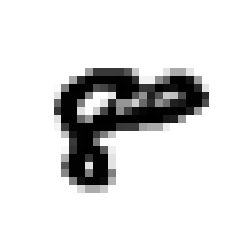

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [0]:
# Show a random input

i = 8047
plt.imshow(InputData_train[i,:].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
print(y_train[i,:])

Loss funcitons:
1. mean square eror
  `loss = (y - t)^2`
  these loss will be reduced only if y==t

  its derivative = 2(y-t) gradient is positve when y>t , negative when y<t


2. cross entropy

`          c
loss =  - E   t_c log y_c
           c=1 
`

y_c should be more inturn to have less loss 

In [0]:
# defininng activation, loss, and theor derivatives

def sigmoid(x):
  return 1/(1+np.exp(-x))

def sigmoid_derivative(z):
  return z* (1-z)

'''
the above is derivative inturn of output i.e; z
the derivative inturns of input i.e; x is follows
def sigmoid_derivative(z):
  return (1/(1+np.exp(-x))) * (1 - (1/(1+np.exp(-x))))
'''

def relu (x):
  return np.maximum(0,x)

def relu_derivative(x):
  return 0.5 * (np.sign(x)+ 1) 
  #its derivative is either 0 / 1

def CrossEntropyLoss(y, y_hat):
  L_sum = np.sum(np.multiply(y, np.log(y_hat)))
  m = y.shape[1]
  L = -(1/m) * L_sum
  return L

def softmax(y):
  return np.exp(y) / np.sum(np.exp(y), axis = 0)

def CE_Softmax_Derivative(output, ideal_output):
  return output - ideal_output

In [0]:
inputDim = InputData_train.shape[1]
nHidden = 64#no of hidden nodes
learning_rate = 0.1
weight_decay = 0.001# regularizer on L2 norm of weights

W1 = 0.01*np.random.randn(nHidden, inputDim)
# weigths for input layer to hidden layer
#use random gaussian variable to generate random no's
#instead of uniform random variable , reason is all wt going to be positive
b1 = np.zeros((nHidden, 1))
#bias usually set to 0 , equal to no of output nodes
W2 = 0.01*np.random.randn(nDigits, nHidden)
# weigths for hidden layer to output layer
b2 = np.zeros((nDigits, 1))
#bias usually set to 0 , equal to no of output nodes

inputData = InputData_train
y = y_train


Epoch 0 cost:  2.3025926683067466
Epoch 10 cost:  2.2967478477382293
Epoch 20 cost:  2.2866918012286335
Epoch 30 cost:  2.265755988591673
Epoch 40 cost:  2.2223800410151555
Epoch 50 cost:  2.1406764812990917
Epoch 60 cost:  2.0069494183095484
Epoch 70 cost:  1.8168370196616284
Epoch 80 cost:  1.590899414563243
Epoch 90 cost:  1.3702588002949077


<function matplotlib.pyplot.show>

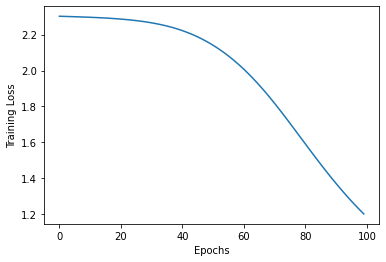

In [0]:
nEpochs = 100
costPlot = np.zeros(nEpochs)
#plot the loss at each epoch

for i in range(nEpochs):

    #forward pass
    Z1 = np.matmul(W1,inputData.T) + b1
    A1 = relu(Z1)#activation function
    Z2 = np.matmul(W2,A1) + b2
    A2 = softmax(Z2)#ouptut of NN wrt softmax activation function
    # for each of 60k input we have 10 dim vector

    cost = CrossEntropyLoss(y.T, A2)#cal the cost and save in costPlot
    costPlot[i] = cost

    #backpropoagation using chain rule
    dZ2 = CE_Softmax_Derivative(A2,y.T)# derivative of loss wrt Z2
    dW2 = (1./m) * np.matmul(dZ2, A1.T)# derivative of W2 =  derivative of loss Wrt Z2 * derivate of A1
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)# derivative of bias = cal using  derivative of loss wrt Z2

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = (1./m) * np.matmul(dZ1, inputData)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    #updating the weights
    W2 -= learning_rate * dW2 + weight_decay * W2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1 + weight_decay * W1
    b1 -= learning_rate * db1
    
    if (i % 10 == 0):
        print("Epoch", i, "cost: ", cost)
    
plt.plot(costPlot)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.show


In [0]:
#on test daata
Z1 = np.matmul(W1, InputData_test.T) + b1
A1 = relu(Z1)
Z2 = np.matmul(W2, A1) + b2

predictions = np.argmax(Z2, axis=0)
labels = np.argmax(y_test.T, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))


[[ 957    0   40   12    8   70   45   14   22   24]
 [   0 1123   84   19   23   30   30   56   58   20]
 [   2    3  756   27    4   15   11   16   33    2]
 [   5    3   29  846    0  327    6    0  126   13]
 [   0    0   14    0  553   13   10    1    9  106]
 [   1    0    1    6    0  231    2    0    4    2]
 [   9    3   58    8   37   52  845    0   15    4]
 [   1    1   16   20    3   58    0  905   22  230]
 [   5    2   30   63   13   71    8   15  651   14]
 [   0    0    4    9  341   25    1   21   34  594]]
              precision    recall  f1-score   support

           0       0.98      0.80      0.88      1192
           1       0.99      0.78      0.87      1443
           2       0.73      0.87      0.80       869
           3       0.84      0.62      0.72      1355
           4       0.56      0.78      0.66       706
           5       0.26      0.94      0.41       247
           6       0.88      0.82      0.85      1031
           7       0.88      0.72   

####lr = 0.1

Epoch 0 cost:  1.1841595778547134
Epoch 10 cost:  1.0387520447187006
Epoch 20 cost:  0.9273086685377763
Epoch 30 cost:  0.841416377654689
Epoch 40 cost:  0.7743553916431688
Epoch 50 cost:  0.7211758039595011
Epoch 60 cost:  0.6783059542564392
Epoch 70 cost:  0.643173592479092
Epoch 80 cost:  0.6139303368036677
Epoch 90 cost:  0.5892411424211795


<function matplotlib.pyplot.show>

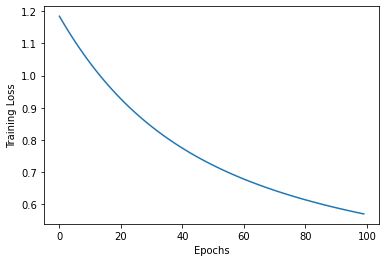

In [0]:
# trying with different learning rate = 0.1
learning_rate = 0.1
nEpochs = 100
costPlot = np.zeros(nEpochs)
#plot the loss at each epoch

for i in range(nEpochs):

    #forward pass
    Z1 = np.matmul(W1,inputData.T) + b1
    A1 = relu(Z1)#activation function
    Z2 = np.matmul(W2,A1) + b2
    A2 = softmax(Z2)#ouptut of NN wrt softmax activation function
    # for each of 60k input we have 10 dim vector

    cost = CrossEntropyLoss(y.T, A2)#cal the cost and save in costPlot
    costPlot[i] = cost

    #backpropoagation using chain rule
    dZ2 = CE_Softmax_Derivative(A2,y.T)# derivative of loss wrt Z2
    dW2 = (1./m) * np.matmul(dZ2, A1.T)# derivative of W2 =  derivative of loss Wrt Z2 * derivate of A1
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)# derivative of bias = cal using  derivative of loss wrt Z2

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = (1./m) * np.matmul(dZ1, inputData)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    #updating the weights
    W2 -= learning_rate * dW2 + weight_decay * W2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1 + weight_decay * W1
    b1 -= learning_rate * db1
    
    if (i % 10 == 0):
        print("Epoch", i, "cost: ", cost)
    
plt.plot(costPlot)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.show


In [0]:
#on test daata
Z1 = np.matmul(W1, InputData_test.T) + b1
A1 = relu(Z1)
Z2 = np.matmul(W2, A1) + b2

predictions = np.argmax(Z2, axis=0)
labels = np.argmax(y_test.T, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[ 951    0   16    6    2   21   23    5    8   10]
 [   0 1103   21    4    6    6    4   28   17    7]
 [   5    1  865   22    3    8   16   26   18    7]
 [   1    4   23  881    0   86    1    0   40    8]
 [   0    0   25    0  847   12   15    7   14  107]
 [  13    0    1   34    0  641   19    0   44   13]
 [   8    4   27    4   18   34  876    0   18    1]
 [   1    0   18   22    0   13    0  902   11   46]
 [   1   22   35   31   12   55    4   10  780   14]
 [   0    1    1    6   94   16    0   50   24  796]]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      1042
           1       0.97      0.92      0.95      1196
           2       0.84      0.89      0.86       971
           3       0.87      0.84      0.86      1044
           4       0.86      0.82      0.84      1027
           5       0.72      0.84      0.77       765
           6       0.91      0.88      0.90       990
           7       0.88      0.89   

####more hidden nodes , lr = 0.1

Epoch 0 cost:  2.302814425153515
Epoch 10 cost:  2.293711133344088
Epoch 20 cost:  2.27740655119013
Epoch 30 cost:  2.2422019822863968
Epoch 40 cost:  2.1697707980720478
Epoch 50 cost:  2.0407897945107614
Epoch 60 cost:  1.8491181742688068
Epoch 70 cost:  1.6122751785750218
Epoch 80 cost:  1.375406663988631
Epoch 90 cost:  1.1783386513765757
[[ 941    0   36    8    1   66   29    9   16   17]
 [   0 1115   53   16   12   27   11   54   44   18]
 [   2    3  771   31    1   35   25   15   35    3]
 [   6    4   45  859    0  278    2    1   96   12]
 [   0    0   31    0  790   17   14   11   21  215]
 [  10    0    1   10    0  295    7    0   18    4]
 [  15    2   53    3   31   42  858    1   14    5]
 [   1    1   15   23    2   46    0  890   21   91]
 [   5   10   25   49   10   62   12   16  678   13]
 [   0    0    2   11  135   24    0   31   31  631]]
              precision    recall  f1-score   support

           0       0.96      0.84      0.89      1123
           1    

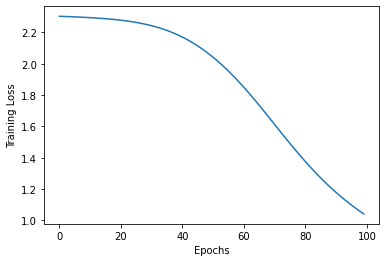

In [0]:
#trying with more hidden nodes

inputDim = InputData_train.shape[1]
nHidden = 128#no of hidden nodes
learning_rate = 0.1
weight_decay = 0.001# regularizer on L2 norm of weights

W1 = 0.01*np.random.randn(nHidden, inputDim)
# weigths for input layer to hidden layer
#use random gaussian variable to generate random no's
#instead of uniform random variable , reason is all wt going to be positive
b1 = np.zeros((nHidden, 1))
#bias usually set to 0 , equal to no of output nodes
W2 = 0.01*np.random.randn(nDigits, nHidden)
# weigths for hidden layer to output layer
b2 = np.zeros((nDigits, 1))
#bias usually set to 0 , equal to no of output nodes

inputData = InputData_train
y = y_train


nEpochs = 100
costPlot = np.zeros(nEpochs)
#plot the loss at each epoch

for i in range(nEpochs):

    #forward pass
    Z1 = np.matmul(W1,inputData.T) + b1
    A1 = relu(Z1)#activation function
    Z2 = np.matmul(W2,A1) + b2
    A2 = softmax(Z2)#ouptut of NN wrt softmax activation function
    # for each of 60k input we have 10 dim vector

    cost = CrossEntropyLoss(y.T, A2)#cal the cost and save in costPlot
    costPlot[i] = cost

    #backpropoagation using chain rule
    dZ2 = CE_Softmax_Derivative(A2,y.T)# derivative of loss wrt Z2
    dW2 = (1./m) * np.matmul(dZ2, A1.T)# derivative of W2 =  derivative of loss Wrt Z2 * derivate of A1
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)# derivative of bias = cal using  derivative of loss wrt Z2

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = (1./m) * np.matmul(dZ1, inputData)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    #updating the weights
    W2 -= learning_rate * dW2 + weight_decay * W2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1 + weight_decay * W1
    b1 -= learning_rate * db1
    
    if (i % 10 == 0):
        print("Epoch", i, "cost: ", cost)
    
plt.plot(costPlot)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.show


#on test daata
Z1 = np.matmul(W1, InputData_test.T) + b1
A1 = relu(Z1)
Z2 = np.matmul(W2, A1) + b2

predictions = np.argmax(Z2, axis=0)
labels = np.argmax(y_test.T, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

Change in lr and no of hidden nodes impact the accuray
note: dont change two parameters at a time, because we cant decide which hyper parameter effects the model